# Task 4 - Implement 10.16 and 15.4
### Author: Luci McDaniel
### Repo Link: https://github.com/LuciMcD/datafun-07-ml-predictive  

## Part 1 - Linear Regression

Creating a lambda and using it to calculate the Celsius equivalents of the Fahrenheit temps, and then graphing that to show the linear relationship. 

In [62]:
c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101,10)]

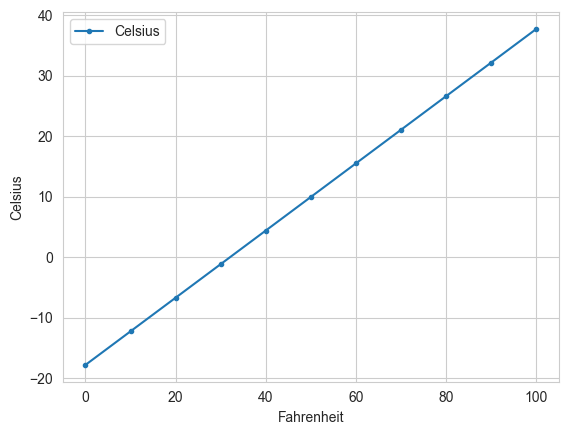

In [63]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Section1: Loading the Average High Temperatures into a DataFrame
This data shows the average temperatures in New York City in january of 1895 to 2018. 
Data pulled from the site: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00094728/tavg/1/1/1895-2018?base_prd=true&begbaseyear=1895&endbaseyear=2018 

In [64]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Looking at the head and tail of the dataset.

In [65]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90
3,189801,39.60,2.20
4,189901,36.40,-1.00


In [66]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


### Section 3: Cleaning the Data

In [67]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


In [68]:
nyc.Date.dtype

dtype('int64')

In [69]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


### Section 4: Calculating Basic Descriptive Statistics for the Dataset

In [70]:
pd.options.display.float_format = '{:,.2f}'.format
nyc.Temperature.describe()

count   124.00
mean     37.60
std       4.54
min      26.10
25%      34.58
50%      37.60
75%      40.60
max      47.60
Name: Temperature, dtype: float64

### Section 5: Calculate a line

In [71]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [72]:
linear_regression.slope

0.014771361132966163

In [73]:
linear_regression.intercept

8.694993233674289

### Section 6: Predicting
Below we are "predicting" the temperature for year 2019, and again for 2026.

In [74]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [75]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

Now we can also approximate what the temperature could have been in 1890.

In [76]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Plotting the high temps and a regression line.

(10.0, 70.0)

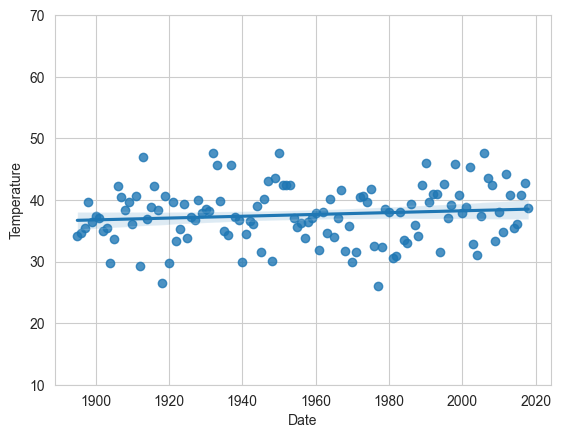

In [77]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 2 - Machine Learning
Time Series and Simple Linear Regression

### Section 1 - Loading the data

In [78]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


### Section 2 - Splitting the Data 

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)


In [80]:
X_train.shape

(93, 1)

In [81]:
X_test.shape

(31, 1)

### Section 3 - Training the Model

In [82]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [83]:
linear_regression.coef_

array([0.01939167])

In [84]:
linear_regression.intercept_

-0.30779820252656975

### Section 4 - Testing the Model

In [85]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 5 - Predicting Future Temperatures and Estimating Past Temperatures

In [86]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [87]:
predict(2019)

array([38.84399018])

In [88]:
predict(2026)

array([38.97973189])

In [89]:
predict(1890)

array([36.34246432])

### Section 6 - Visualizing the Dataset with the Regression Line

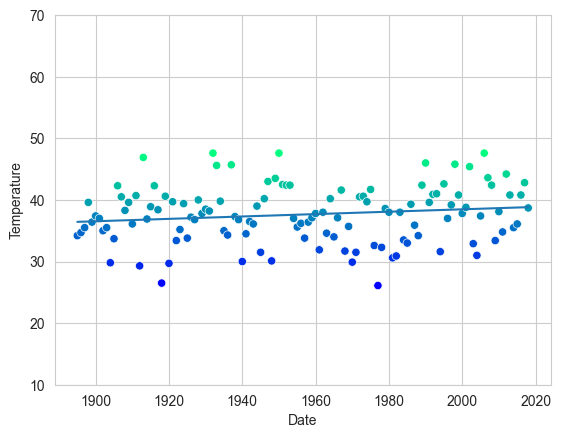

In [95]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                        hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)

## Final Thoughts
#### Comparing the 2 methods above. 

Part 1 - Linear Regression and Part 2 - Machine Learning are very similar. The code language is subtly different. I prefer the second method of machine learning. I think the scatter plot output was more visually appealing in part 2. There was more setup in Part 2 but predicting was more simple. The linear regression in part 1, was a simple code but it felt limited to me. I would prefer part 2. 

Overall linear regression is used to show the relationship between dependent and independent variables, where machine learning can be used for that and much more. Machine learning is much broader in its capabilities. 